<img src="https://bioinf.nl/~davelangers/hanze.png" align="right" />

# <span id="0">Casus *Hidden Markov Model* - Deel I</span>

Inhoud:

* **<a href="#1">CpG-islands (CGIs)</a>**

* **<a href="#2">Hidden Markov Models</a>**

* **<a href="#3">CpG-eiland en non-CpG-eiland sequenties</a>**

* **<a href="#4">Toy-data</a>**

* **<a href="#5">Je eigen `HiddenMarkovModel` class</a>**

In [ ]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

from matplotlib import pyplot as plt
import numpy as np

<a id="1" href="#0" style="text-align: right; display: block;">Terug naar boven</a>

### CpG-islands (CGIs)

CpG-eilandjes zijn elementen in het genoom die een grote invloed uitoefenen op de regulatie van genexpressie door DNA-methylatie. Hun rol in kankerontwikkeling door abnormale methylatie van tumorsuppressorgenen en oncogenen maakt het een doelwit voor diagnostische en therapeutische benaderingen. Begrip van de dynamiek van CpG-eilandjes biedt inzicht in de moleculaire mechanismen van kanker en mogelijkheden voor innovatieve behandelingsstrategieën.

CpG-eilandjes zijn gebieden in het DNA die een hoge dichtheid hebben aan CpG-dinucleotiden, waarbij "CpG" staat voor een cytosine nucleotide (C) gevolgd door een guanine nucleotide (G) verbonden door een fosfaatgroep (p). Deze eilanden zijn meestal ongewoon rijk aan de CG-combinatie en bevatten vaak geen gemethyleerde cytosines, wat hen onderscheidt van de rest van het genoom waar CpG dinucleotiden vaak gemethyleerd zijn en daardoor minder frequent voorkomen. CpG-eilandjes komen vaak voor in of nabij de promotorregio's van genen, die de expressie van de corresponderende genen reguleren. Ze zijn typisch een paar honderd tot een paar duizend basenparen lang en hebben een GC-gehalte van meer dan 50%, met een CpG-dichtheid hoger dan wat gemiddeld is voor het genoom.

CpG-eilandjes spelen een cruciale rol bij de regulatie van genexpressie via hun invloed op DNA-methylatie, een epigenetisch mechanisme. Dit proces voegt een methylgroep toe aan het cytosine-residu in CpG-dinucleotiden, meestal door de werking van DNA-methyltransferasen. In promotorregio's is methylatie vaak geassocieerd met gen-silencing omdat het de binding van transcriptiefactoren en andere noodzakelijke eiwitten voor genexpressie ontmoedigt. Omgekeerd kan het demethyleren van CpG-eilandjes de expressie van geassocieerde genen activeren, aangezien het de toegankelijkheid van transcriptiefactoren en RNA-polymerase vergroot.

<img src="https://media.licdn.com/dms/image/D4D22AQEdqGnu8ZC80Q/feedshare-shrink_2048_1536/0/1684682580953?e=2147483647&v=beta&t=r6jlPalFOi_YDqJ_tBSPkdZRlvfakvmH1DVf9bnTTEk" width="40%" heigth="40%" />

De epigenetische modificatie van CpG-eilandjes speelt een belangrijke rol in kankerontwikkeling door abnormale genexpressie. In kankercellen worden CpG-eilandjes in de promotorregio's van tumorsuppressorgenen vaak hypergemethyleerd. Dit leidt tot silencing van deze genen, wat bijdraagt aan ongecontroleerde celgroei en proliferatie. Voorbeelden van tumorsuppressorgenen die vaak gehypermethyleerd zijn in kanker omvatten *p16INK4a* en *BRCA1*. Globale hypomethylatie van het genoom kan ook voorkomen in kankercellen, wat resulteert in genomische instabiliteit en de activatie van oncogenen. Dit draagt bij aan tumorvorming en -progressie.

Abnormale methylatiepatronen van CpG-eilandjes kunnen dienen als biomarkers voor de vroege detectie en diagnose van kanker. Epigenetische therapieën, zoals DNA-methylatie-inhibitoren (bijv. azacitidine en decitabine), worden gebruikt om abnormale methylatie om te keren en de normale expressie van tumorsuppressorgenen te herstellen.

Bekijk onderstaande inleidende video en schrijf er een samenvatting van. Zoek zo nodig zelf uitgebreidere achtergrondinformatie over onbekende onderwerpen en vermeld deze bronnen in je samenvatting als referenties. Neem onder andere de bijbehorende [Wikipedia](https://en.wikipedia.org/wiki/CpG_site) pagina door.

In [ ]:
%%html
<iframe width="640" height="360" src="https://www.youtube.com/embed/bc3wtVXyAXo" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

# Samenvatting CpG-eilandjes
Een CpG of *5'-C-fosfaat-G-3* is een dinucleotide waar een cytosine wordt gevolgd door een guanine in de 5'-3' richting. De p in de naam staat voor de fosfaatgroep waarmee de twee nucleotiden zijn verbonden. CpG's komen vooral voor binnen bepaalde regio's in het genoom, ook wel de CpG eilanden. Bepaalde kenmerken van CpG eilanden zijn:

- Lengte van >200 baseparen
- Een GC percentage van >50%
- Een waargenomen/verwacht ratio van >60%

CpG's komen niet veel voor in vertebraten, het waargenomen percentage is **1%**. Er zijn 16 verschillende dinucleotide combinaties, dit maakt het verwachtte percentage **6,25%**. De reden dat CpG's in werkelijkheid maar 1% voorkomen is de-aminering van gemethyleerde cytosine. Bij de-aminering van niet gemethyleerde cytosine verandert deze in uracil. Uracil komt niet voor in DNA en kan daardoor herkend en verwijderd worden door uracil-DNA-glycosylase. Bij de-aminering van **gemethyleerde cytosine** veranderd deze in thymine. Beide nucleotiden komen voor in het DNA, hierdoor kan niet makkelijk herkend worden welke van de twee onjuist is. Bij deze situatie komt een ander reparatiemechanisme kijken, *thymine-DNA-glycosylase* (TDG), dit enzym verwijdert T's binnen de T-G mismatches. TDG is niet ze snel als uracil-DNA-glycosylase, hierdoor kan het DNA soms repliceren voordat de mismatch is opgelost, met als gevolg dat de T behouden blijft en er een complementaire A wordt gekoppeld. Hierdoor veranderen CpG's naar TpG's en ligt het CpG percentage lager dan verwacht.

CpG eilanden liggen vaak binnen **promoterregio's**, bij mensen heeft ~70% van de promotorregio's een hoog CG-percentage. De CpG eilanden spelen een rol bij genexpressie, als er sprake is van hypermethylatie is het DNA minder toegankelijk voor transcriptiefactoren, dit leidt tot lagere genexpressie of gene silencing. CpG eilanden zijn vaak niet gemethyleerd, dit hebben ze te danken aan hun promotor rol. Genen die actief horen te zijn hebben vaak ongemethyleerde CpG promotorregio's, genen die inactief horen te zijn hebben vaak gemethyleerde CpG promotorregio's. In de vroege ontwikkeling van vertebraten is het belangrijk dat alle genen die nodig zijn voor groei en ontwikkeling tot expressie komen, ~90% van de genen komt dan tot expressie. Gedurende de normale ontwikkeling zal een deel van de genen gemethyleerd worden en niet meer tot expressie komen.


*Wanneer een gen dat inactief hoort te zijn niet gemethyleerd is kan dat risico's meebrengen. Zo zouden oncogenen actief kunnen worden als gevolg van hypomethylatie, hierdoor zou er tumorgroei kunnen plaatsvinden. Hetzelfde geldt voor de hypermethylatie van een actief gen, bijvoorbeeld een tumorsupressorgen.*

<a id="2" href="#0" style="text-align: right; display: block;">Terug naar boven</a>

### Hidden Markov Models

CpG-eilandjes kunnen worden gedetecteerd met behulp van verschillende computationele methoden, waarvan een van de meest effectieve methoden het gebruik van Hidden Markov Models (HMMs) is.

Een Hidden Markov Model is een krachtig hulpmiddel voor het modelleren van tijdreeksen en sequentiële data waarin de werkelijke toestanden niet direct zichtbaar zijn, maar waar de uitkomsten afhankelijk zijn van deze toestanden. HMMs maken gebruik van probabilistische berekeningen om te schatten welke verborgen toestanden het meest waarschijnlijk zijn gegeven de waargenomen data, wat ze tot een waardevol instrument maakt in een breed scala aan toepassingen. HMMs worden breed toegepast in verschillende domeinen van de bioinformatica, maar ook bijvoorbeeld in spraakherkenning en natuurlijke taalverwerking of financiële modellering van markttendensen.

Hidden Markov Models zijn zeer geschikt voor de detectie van CpG-eilandjes vanwege hun vermogen om sequenties te modelleren en patronen te herkennen in biologische data. In het kader van CpG-eilandjes vormen de verschillende nucleotiden in het DNA de waargenomen data, en is de aanwezigheid van een CpG-eiland, al dan niet, de verborgen toestand. Door het toepassen van HMMs kunnen wetenschappers efficiënt de locatie van CpG-eilandjes bepalen, wat waardevolle inzichten biedt in genregulatie en kankeronderzoek.

<img src="https://www.researchgate.net/profile/Tomer-Toledo/publication/245563174/figure/fig1/AS:669081116094471@1536532777801/State-transition-diagram-of-a-hidden-Markov-model.png" width="40%" height="40%" />

Een HMM wordt gekarakteriseerd door de volgende eigenschappen:

* **Toestanden / States** Een gegeven aantal verschillende verborgen interne toestanden waarin een geobserveerd systeem zich kan bevinden. In de context van CpG-eilandjesdetectie kunnen de toestanden bijvoorbeeld "in een CpG-eiland" en "buiten een CpG-eiland" zijn.

* **Overgangswaarschijnlijkheden / Transition probabilities** De kans dat het systeem van de ene toestand naar de andere overgaat. Bijvoorbeeld, de kansen om van "buiten een CpG-eiland" naar "in een CpG-eiland" te veranderen, en omgekeerd, of de kansen om binnen dezelfde toestand te blijven.

* **Emissiekansen / Emission probabilities** De kans om een bepaalde uitkomst te observeren vanuit een gegeven toestand. Voor CpG-eilandjes zijn dit de kansen van het voorkomen van verschillende nucleotiden (A, T, C, G) zowel in als buiten de eilandjes.

* **Begintoestandsverdeling / Start probabilities** De initiële waarschijnlijkheden dat het systeem dat zich in een bepaalde toestand bevindt. Een DNA-sequentie kan met zekere kans beginnen met een CpG-eilandje, of niet.

Een HMM maakt, net als elk model, diverse aannamen die de analyse van gegevens vereenvoudigen. De belangrijkste aannamen van een HMM zijn dat (1) het waargenomen systeem zich alléén in een discreet (d.w.z. eindig) aantal verschillende toestanden kan bevinden die variëren in de loop van de reeks, (2) dat de waarnemingen die aan het systeem gedaan worden alléén afhangen van de huidige toestand van het systeem, en (3) dat de kansverdeling omtrent wat de toestand van het systeem op een volgend moment gaat zijn alléén afhangt van wat de toestand van het systeem op een voorgaand moment was.

De toestand van het systeem is zelf niet rechtstreeks waarneembaar; wel waarneembaar zijn de emissies die afhangen van de toestand. De meestgestelde vraag die een HMM kan proberen te beantwoorden is: "gegeven een serie waarnemingen, wat waren de meest waarschijnlijke onderliggende toestanden van het systeem"? Bijvoorbeeld, in ons geval: "gegeven een nucleotidesequentie, welke delen vallen in een CpG-eiland en welke vallen erbuiten"?

Bekijk onderstaande inleidende video en schrijf er een samenvatting van. Zoek zo nodig zelf uitgebreidere achtergrondinformatie over onbekende onderwerpen en vermeld deze bronnen in je samenvatting als referenties. Neem onder andere de bijbehorende [Wikipedia](https://en.wikipedia.org/wiki/Hidden_Markov_model) pagina door.

In [ ]:
%%html
<iframe width="640" height="360" src="https://www.youtube.com/embed/fX5bYmnHqqE" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

# Samenvatting Hidden Markov Model
Het HMM-model heeft het vermogen om sequenties te modelleren en patronen te herkennen onder andere in biologische data, zo is het een van de meest effectieve manieren om CpG eilanden te detecteren.

## De structuur van HMM
Een Hidden Markov Model wordt gekenmerkt door de volgende eigenschappen:

**States**:
Een gegeven aantal toestanden waarin een systeem zich kan bevinden. Dit aantal moet eindig zijn, zie ook de aannames van HMM verderop in de samenvatting.

**Start probabilities**:
De initiële waarschijnlijkheden dat het systeem zich in een bepaalde toestand bevindt. Bij het toy model waren deze kansen ongelijk verdeeld, zo begonnen 4 personen bij tafel 1, 3 bij tafel 2 en 2 bij tafel 3. Je zou dus kunnen stellen dat de kansen gelijk zijn aan `[4/9, 3/9, 2/9]`, ongeveer  `[0.44, 0.33, 0.22]`.

**Transition probabilities** (**hidden states**)
De kans dat het systeem van de ene toestand over gaat naar een volgende toestand. Dit kan weer dezelfde staat zijn, maar ook een andere.
De staat binnen een HMM is niet zichtbaar (vandaar ook "hidden" in de naam van het model).

Een voorbeeld van de staten zijn de 3 tafels van het toy model. Per tafel verschilde de kans op wat de volgende staat zou worden.
In de tabel hieronder zijn de transitiekansen te zien van de tafel staten. Met aan de linkerkant de t-1 staat, ofwel de vorige staat, en bovenaan de nieuwe huidige staat. *Het is belangrijk dat de rijen samen 1 zijn!*

|             | Tafel 1 | Tafel 2 | Tafel 3 |
| ----------- | ------- | ------- | ------- |
| **Tafel 1** | 0.167   | 0.5     | 0.333   |
| **Tafel 2** | 0.167   | 0.333   | 0.5     |
| **Tafel 3** | 0.666   | 0.167   | 0.167   |

**Emission probabilities** (**observed states**):
De gegeven kans op een bepaalde emissie in een bepaalde toestand. In tegenstelling tot de onzichtbare staten, zijn emissies wel zichtbaar. Als voorbeeld weer het toy model, de emissies ofwel zichtbare observaties zijn de kralen. Bij sommige tafels kwamen bepaalde kleuren kralen vaker voor, en bij andere minder. Aan de hand hiervan kan je bijvoorbeeld stellen '*gegeven de staat tafel 1, wat is de kans op de emissie geel?*'

Hieronder staat de emissietabel voor het toy model, met bovenaan de verschillende emissies (dus kraalkleuren) en aan de linkerkant de staten.

|             | Rood  | Groen | Geel | Blauw |
| ----------- | ----- | ----- | ---- | ----- |
| **Tafel 1** | 0.167 | 0.083 | 0.25 | 0.5   |
| **Tafel 2** | 0.167 | 0.167 | 0.5  | 0.167 |
| **Tafel 3** | 0.417 | 0.5   | 0    | 0.083 |

## De aannames van HMM
Een HMM maakt een aantal aannames, die de gebruiker in staat stelt om modellen te kunnen versimpelen:

- De waarnemingen die in het systeem worden gedaan hangen alleen af van de huidige toestand.
- Het systeem kan zich alleen in een discreet aantal verschillende toestanden bevinden.
- De voorspelling van de volgende staat wordt alleen bepaald door de huidige staat
	- *Bijvoorbeeld: de staat op dag 3 wordt alleen beïnvloed door de staat op dag 2

## Berekenen met HMM

Aan de hand van een reeks emissies, kunnen de bijbehorende staten met de hoogste waarschijnlijkheid worden bepaald. Hierbij wordt er gezocht naar de combinatie staten met de hoogste kans om de bijbehorende emissies te vertonen. De formule voor emissies `geel-blauw-groen` is dan:

$P(K_1=\mathrm{Geel},\ K_2=\mathrm{Blauw},\ K_3=\mathrm{Groen},\ S_1=s_1,\ S_2=s_2,\ S_3=s_3)$

De formule kan opgedeeld worden in aparte kansberekeningen:
$P(K_3 \mid K_2,K_1,S_3,S_2,S_1)$
$P(K_2 \mid K_1,S_3,S_2,S_1)$
$P(K_1 \mid S_3,S_2,S_1)$
$P(S_3 \mid S_2,S_1)$
$P(S_2 \mid S_1)$
$P(S_1)$

Dankzij de aannames van HMM, kunnen de formules versimpeld worden tot:

Kijk per kleur (emissie) alleen naar de bijbehorende staat:
- $P(K_3 \mid S_3)$
- $P(K_2 \mid S_2)$
- $P(K_1 \mid S_1)$

Kijk per staat alleen naar de vorige staat:
- $P(S_3 \mid S_2)$
- $P(S_2 \mid S_1)$
- $P(S_1 \mid S)$

Na het invullen van de kansberekeningen, volgt de combinatie van staten met de hoogste kans om de gevonden emissies te vertonen. Bijvoorbeeld:
$P = \{Tafel 1, Tafel 2, Tafel 2\}$


<a id="3" href="#0" style="text-align: right; display: block;">Terug naar boven</a>

### CpG-eiland en non-CpG-eiland sequenties

De onderstaande tabellen geven de experimentele waarschijnlijkheden aan dat een zekere nucleotide (in de rijen) gevolg wordt door een zekere andere nucleotide (in de kolommen) binnen en buiten CpG-eilanden.

Bron: "Biological sequence analysis - Probabilistic models of proteins and nucleic acids", Durbin et al. (1998), hoofdstuk 3, p50-51 ([ref](http://www.mcb111.org/w06/durbin_book.pdf)).

*CGI* (`+`)

|  `+`  |   A   |   C   |   G   |   T   |
| :---: | :---: | :---: | :---: | :---: |
| **A** | 0.180 | 0.274 | 0.426 | 0.120 |
| **C** | 0.171 | 0.368 | 0.274 | 0.188 |
| **G** | 0.161 | 0.339 | 0.375 | 0.125 |
| **T** | 0.079 | 0.355 | 0.384 | 0.182 |

*non-CGI* (`-`)

|  `-`  |   A   |   C   |   G   |   T   |
| :---: | :---: | :---: | :---: | :---: |
| **A** | 0.300 | 0.205 | 0.285 | 0.210 |
| **C** | 0.322 | 0.298 | 0.078 | 0.302 |
| **G** | 0.248 | 0.246 | 0.298 | 0.208 |
| **T** | 0.177 | 0.239 | 0.292 | 0.292 |

Bijvoorbeeld, de kans dat een gegeven C gevolgd wordt door een G is slechts 7.8 % buiten een CpG-eilandje, maar neemt toe tot maar liefst 27.4 % binnen een CpG-eilandje, hetgeen benadrukt hoe sterk CpG-dinucleotiden relatief oververtegenwoordigd zijn binnen CpG-eilandjes. Ga na dat de som van de kansen in elke rij van de tabel moet sommeren tot 100% (op afrondfouten na).

Genereer met python-code een willekeurige sequentie van 300 baseparen lengte overeenkomend met een CpG-eiland en een soortgelijke sequentie van een non-CpG-eiland. Kies telkens het eerste nucleotide willekeurig, en gebruik dan de bovenstaande overgangswaarschijnlijkheden om de sequentie te verlengen. Bepaal van de gegenereerde complete sequenties de kansen op elk nucleotide ($P_A, P_C, P_G, P_T$) evenals de kansen op elk dinucleotide ($P_{AA}, P_{AC}, \ldots, P_{TT}$). Bepaal voor elk dinucleotide ook de ratios $r$ tussen de waargenomen en de verwachte kans, zoals

$$
r_{AC} = \frac{P_{AC}}{P_A \cdot P_C}
$$

Wat kun je verhoudingsgewijs zeggen over hoe vaak C en G afzonderlijk voorkomen, en hoe vaak het CpG-dinucleotide voorkomt? Welke combinaties van nucleotiden zijn het sterkst over- of ondergerepresenteerd?

Hieronder volgt onze uitwerking voor dit onderdeel.

In [ ]:
# Uitwerking voor CGI+
import random

def build_sequence(cgi_weights, nucleotides_list):

    sequence = [random.choice(nucleotides_list)]

    for i in range(299):
        prev = sequence[-1]
        sequence.append(random.choices(nucleotides_list, weights=cgi_weights[prev])[0])

    sequence = "".join(sequence)

    print("\nSequence:\n", sequence)
    return sequence

def observed_nucleotides(sequence):

    observed = np.array([sequence.count(nucleotide)/len(sequence) for nucleotide in nucleotides])

    return observed

def observed_dinucleotides(sequence, observed):
    dinucleotides = np.zeros((4,4))

    for i in range(len(sequence)-1):
        a = nucleotides.index(sequence[i])
        b = nucleotides.index(sequence[i+1])
        dinucleotides[a,b] += 1/(len(sequence)-1)

    print("\nObserved nucleotides:")
    print(np.round(observed, 3))
    print("\nObserved dinucleotides:")
    print(np.round(dinucleotides, 3))

    return dinucleotides

def observed_vs_expected(observed, dinucleotides):

    expected = observed.reshape(4, 1) * observed.reshape(1, 4)

    ratio = dinucleotides / expected
    print("\nObserved/expected ratio:")
    print(np.round(ratio, 3))


if __name__ == "__main__":
    cgi = {
    'A':[0.180, 0.274, 0.426, 0.120],
    'C':[0.171, 0.368, 0.274, 0.188],
    'G':[0.161, 0.339, 0.375, 0.125],
    'T':[0.079, 0.355, 0.384, 0.182]
    }

    nucleotides = ['A', 'C', 'G', 'T']

    print("====cgi+====")
    seq = build_sequence(cgi, nucleotides)
    observed = observed_nucleotides(seq)
    dinucleotides = observed_dinucleotides(seq, observed)
    observed_vs_expected(observed, dinucleotides)

Wat kun je verhoudingsgewijs zeggen over hoe vaak C en G afzonderlijk voorkomen, en hoe vaak het CpG-dinucleotide voorkomt? Welke combinaties van nucleotiden zijn het sterkst over- of ondergerepresenteerd?

- C komt ongeveer 34% voor, G komt ongeveer 32% voor.
- Het CpG-dinucleotide komt 10.7% voor.

Betreffende de vraag welke nucleotiden over- of ondergerepresenteerd zijn:
- De dinucleotiden: GA en AG zijn het sterkste overgerepresenteerd (met ~1.58 en ~1.27 voor de observed/expected ratio).
- De dinucleotiden: AT, AA en GG zijn het sterkste ondergerepresenteerd (met ~0.35, ~0.75 en ~0.8).
Alle andere nog niet genoemde combinaties komen ook niet overeen met het verwachte resultaat (d.w.z. 1.0), echter wijken deze in wat mindere mate af van 1.0 vergeleken met de sterker onder-/overgerepresenteerde genen.

In [ ]:
# Uitwerking voor CGI-
if __name__ == "__main__":
    non_cgi = {
    'A':[0.300, 0.205, 0.285, 0.210],
    'C':[0.322, 0.298, 0.078, 0.302],
    'G':[0.248, 0.246, 0.298, 0.208],
    'T':[0.177, 0.239, 0.292, 0.292]
    }

    nucleotides = ['A', 'C', 'G', 'T']

    print("====cgi-====")
    seq = build_sequence(non_cgi, nucleotides)
    observed = observed_nucleotides(seq)
    dinucleotides = observed_dinucleotides(seq, observed)
    observed_vs_expected(observed, dinucleotides)

Wat kun je verhoudingsgewijs zeggen over hoe vaak C en G afzonderlijk voorkomen, en hoe vaak het CpG-dinucleotide voorkomt? Welke combinaties van nucleotiden zijn het sterkst over- of ondergerepresenteerd?

- C komt omgeveer 25,3% voor, G komt ongeveer 26% voor.
- Het CpG-dinucleotide komt ongeveer 2.7% voor.

Betreffende de vraag welke nucleotiden over- of ondergerepresenteerd zijn:
- De dinucleotiden: AG en CT zijn het sterkste overgerepresenteerd (met beiden ~1.29 voor de observed/expected ratio).
- De dinucleotiden: AT en TA zijn het sterkste ondergerepresenteerd (met ~0.68 en ~0.79).
Alle andere nog niet genoemde combinaties komen ook niet overeen met het verwachte resultaat (d.w.z. 1.0), echter wijken deze in wat mindere mate af van 1.0 vergeleken met de sterker onder-/overgerepresenteerde genen.

Als we CGI+ en CGI- met elkaar vergelijken, lijken zowel C als G minder voor te komen in CGI- (ongeveer 9% minder voor C en 6% minder voor G) en de CpG dinucleotide lijkt ~8% minder vaak voor te komen.

<a id="4" href="#0" style="text-align: right; display: block;">Terug naar boven</a>

### Toy-data

Gegeven zijn drie tafels (overeenkomend met toestanden) die elk een grabbelton bevatten waaruit gekleurde knikkers kunnen worden getrokken (emissies) en met elk een dobbelsteen die bepaalt naar welke volgende tafel je gaat (overgangswaarschijnlijkheden).

| Tafel: |  ❶  |  ❷  |  ❸  |
| -----: | :-: | :-: | :-: |
| **Grabbelton:** | 6x blauw | 2x blauw | 1x blauw |
|                 | 3x geel  | 6x geel  | 0x geel  | 
|                 | 1x groen | 2x groen | 6x groen |
|                 | 2x rood  | 2x rood  | 5x rood  |
| **Dobbelsteen:** | ⚀→① | ⚀→① | ⚀→① |
|                  | ⚁→② | ⚁→② | ⚁→① |
|                  | ⚂→② | ⚂→② | ⚂→① |
|                  | ⚃→② | ⚃→③ | ⚃→① |
|                  | ⚄→③ | ⚄→③ | ⚄→② |
|                  | ⚅→③ | ⚅→③ | ⚅→③ |

Beginnend bij een willekeurige tafel, trek individueel een knikker en noteer de kleur samen met het nummer van de tafel. Gebruik de dobbelsteen om te bepalen naar welke volgende tafel je gaat. Herhaal dit tot je ongeveer een dertigtal waarnemingen hebt gegenereerd en je weer precies terug bent gekomen bij de tafel waar je was begonnen.

Bijvoorbeeld:
| **Beurt:** | 1     | 2     | 3     | 4     | 5     | 6     | 7     | ... | 30    |
| ---------: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :-: | :---: |
| **Tafel:** | ❷     | ❸     | ❶     | ❸     | ❷     | ❷     | ❶     | ... | ❸     |
| **Kleur:** | geel  | groen | blauw | rood  | groen | geel  | blauw | ... | rood  |
| **Worp:**  | ⚃     | ⚀     | ⚄     | ⚄     | ⚂     | ⚀     | ⚂     | ... | ⚄     |

Naast het bepalen van je eigen sequentie, combineer de waarnemingen van al je klasgenoten tot één lange sequentie.

De sequenties van Mirte & Yamila zijn te vinden in het excel bestand op Brightspace, samen met de samengevoegde sequentie met alle waarnemingen van alle klasgenoten.

<a id="5" href="#0" style="text-align: right; display: block;">Terug naar boven</a>

### Je eigen `HiddenMarkovModel` class

Maak een eigen module-bestand genaamd `hmmmodel.py` aan en definieer daarin een klasse `HiddenMarkovModel`. Deze klasse dient een begintoestandsverdeling, overgangswaarschijnlijkheden, en emissiekansen te kunnen bevatten. De klasse dient verder een methode `sample()` te hebben die het mogelijk maakt om een gevraagd aantal waarnemingen te genereren op basis van een gegeven Hidden Markov Model. Voeg implementaties van een aantal standaard dunder-methoden toe (`__init__()`, `__str__()`, `__repr__()`).

Implementeer de functionaliteit van je eigen module zodanig dat deze grotendeels compatibel is met de `CategoricalHMM` klasse van de `hmmlearn` module waarvan je de documentatie [online](https://hmmlearn.readthedocs.io/en/latest/api.html#categoricalhmm) kan vinden. Deze module zit niet in de standaard library van python en dien je zelf wellicht nog te installeren. Merk op dat niet alle functionaliteit uit deze klasse hoeft te worden geïmplementeerd. Vooralsnog gaat het voornamelijk om initialisatie en de `sample()` methode. Later voegen we nog meer methoden aan je klasse toe.

Gebruik je eigen module om sequenties van 1200 toestanden en bijbehorende waarnemingen te genereren voor de eerdere toy-data. De tafelnummers zijn daarin de toestanden en de kleuren knikkers zijn de emissies. Dit zou moeten kunnen met code zoals hieronder.

```python
from hmmmodel import HiddenMarkovModel as HMM
model = HMM(n_components=..., n_features=...)
model.startprob_ = ...
model.transmat_ = ...
model.emissionprob_ = ...
emissions, states = model.sample(1200)
print(model)
```

Toon histogrammen van de toestanden en emissies voor al deze sequenties, en schat *op basis van de gegenereerde sequentie* de overgangswaarschijnlijkheden en emissiekansen. Ga na of deze goed overeenkomen met de instellingen van het Hidden Markov Model.

Vergelijk tenslotte of je eigen klasse soortgelijke resultaten geeft als `hmmlearn.hmm.CategoricalHMM` (d.w.z. met soortgelijke code als hierboven, maar met `from hmmlearn.hmm import CategoricalHMM as HMM`).

Hieronder implementeren we onze versie van het Hidden Markov Model, om visualisaties te genereren. De klasse die hiervoor is gebruikt kan worden teruggevonden in het python script 'hmmmodel.py'. Vervolgens hebben we ook onze resultaten vergeleken met dat van de hmmlearn library. Voor de visualisaties is een samplegrootte gebruikt van 1200.

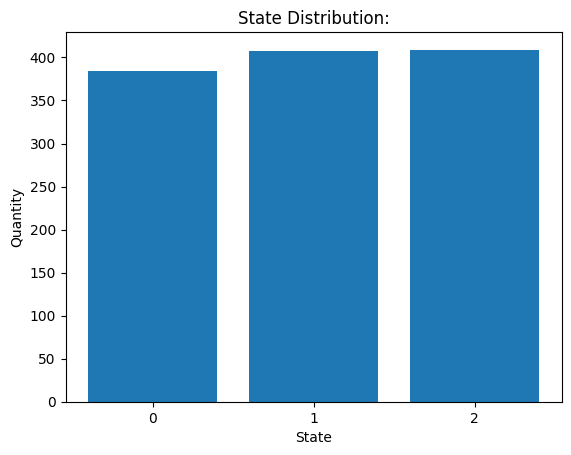

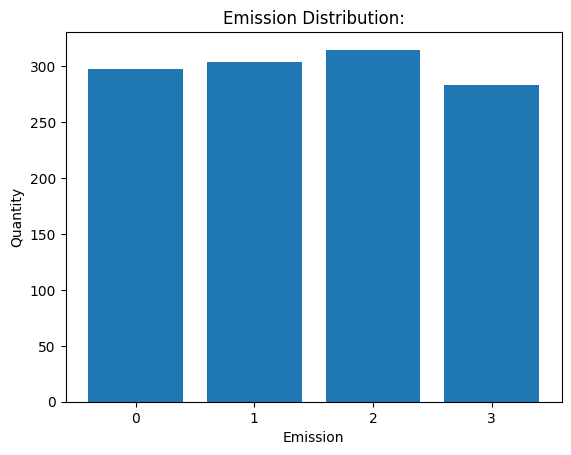

In [16]:
from hmmmodel import HiddenMarkovModel as HMM
from hmmmodel import bar_plot
from hmmmodel import matrix_plot
from hmmlearn.hmm import CategoricalHMM as hmm
import numpy as np

# Startkansen (gelijk voor elke tafel)
startprob = np.array([1/3, 1/3, 1/3])

# Overgangskansen
transprob = {
        0:[1/6,1/2,1/3],
        1:[1/6,1/3,1/2],
        2:[2/3,1/6,1/6]
}

# Emissiekansen
emissionprob = {
        0:[1/6, 1/12, 1/4, 1/2],
        1:[1/6, 1/6, 1/2, 1/6],
        2:[5/12, 1/2, 0, 1/12]
}

states = [0, 1, 2] # tafel 1 = 0, tafel 2 = 1, tafel 3 = 2
emissions = [0, 1, 2, 3] # Blue = 0, Green = 1, Yellow = 2, Red = 3

# Creeeren van model en sequentie adhv start-overgangs- en emissiekansen
model = HMM(startprob, transprob, emissionprob, states, emissions)
resulting_states, resulting_emissions = model.sample(1200)

bar_plot(states, emissions, resulting_states, resulting_emissions)


## Conclusie barplots
De verdeling van staten en emissies lijkt redelijk gelijk, deze verandert natuurlijk elke keer dat het model opnieuw wordt aangeroepen, kleine veranderingen komen hierbij wel voor, maar over het algemeen blijven de verhoudingen van de verschillende emissies en staten gelijk.

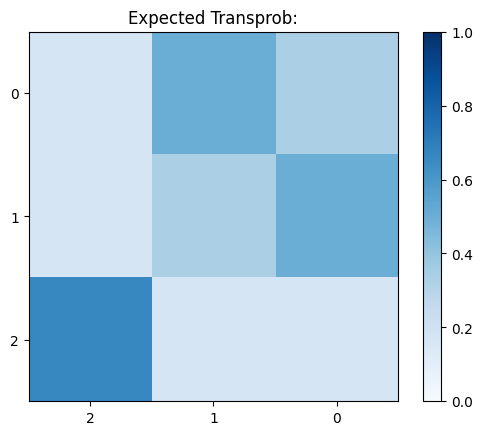

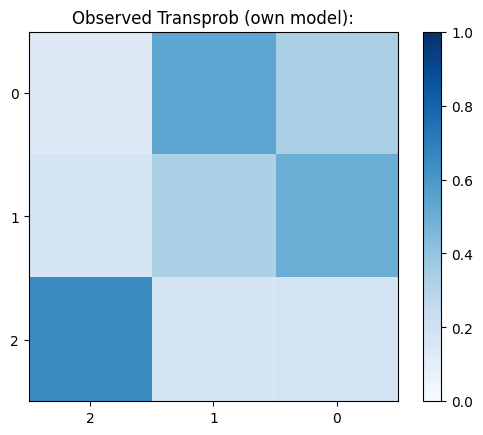

In [17]:
observed_states, observed_emissions = model.determine_observations(resulting_states, resulting_emissions)

# Matrix plots voor overgangskansen
ylabs = [str(x) for x in states]

transprob_array = np.array(list(transprob.values()))

matrix_plot(transprob_array, "Expected Transprob:",  xlabs=ylabs[::-1], ylabs = ylabs)
matrix_plot(observed_states, "Observed Transprob (own model):", xlabs=ylabs[::-1], ylabs = ylabs)

## Conclusie matrixplots: overgangskansen

De verwachte overgangskansen zijn gebaseerd op de overgangstabel van de verschillende staten, in dit geval de tafels 1, 2 en 3. Zie de tabel hieronder:

|             | Tafel 1 | Tafel 2 | Tafel 3 |
| ----------- | ------- | ------- | ------- |
| **Tafel 1** | 1/6     | 1/2     | 1/3     |
| **Tafel 2** | 1/6     | 1/3     | 1/2     |
| **Tafel 3** | 2/3     | 1/6     | 1/6     |

De geobserveerde overgangskansen geven aan wat er daadwerkelijk is geobserveerd uit de willekeurig (met gewichten) gegenereerde reeks. De verwachte/geobserveerde overgangskansen lijken vrijwel geheel overeen te komen, op een paar extreem kleine verschillen na. De verschillen lijken niet heel stabiel en lijken steeds anders bij het opnieuw genereren van een sequentie. De kleine verschillen komen nog voor bij een sample grootte van 1200, maar door deze te verhogen tot bijvoorbeeld 120000, komen er helemaal geen verschillen meer voor tussen de verwachte en geobserveerde kansen. Over de overgangskansen kan dus worden gezegd dat de geobserveerde kansen goed overeenkomen met de ingestelde, of verwachte kansen.

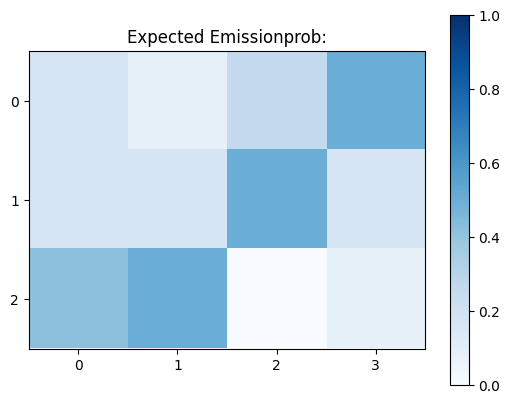

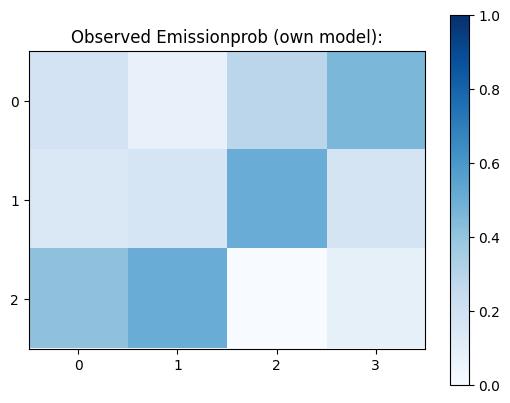

In [18]:
# Matrix plots voor emissie kansen
xlabs = [str(x) for x in emissions]
emissionprob_array = np.array(list(emissionprob.values()))

matrix_plot(emissionprob_array, "Expected Emissionprob:", xlabs,  ylabs = ylabs)
matrix_plot(observed_emissions, "Observed Emissionprob (own model):", xlabs,  ylabs = ylabs)

## Conclusie matrixplots: emissiekansen

De verwachte emissiekansen zijn gebaseerd op de overgangstabel van de verschillende emissiekansen per staat. Hierbij zijn de staten tafel 1, 2 en 3 en de emissies rood, groen, geel en blauw. Zie de tabel hieronder:

|             | Rood | Groen | Geel | Blauw |
| ----------- | ---- | ----- | ---- | ----- |
| **Tafel 1** | 1/6  | 1/12  | 1/4  | 1/2   |
| **Tafel 2** | 1/6  | 1/6   | 1/2  | 1/6   |
| **Tafel 3** | 5/12 | 1/2   | 0    | 1/12  |

De verwachte- en geobserveerde emissiekansen lijken, net als de verwachte- en geobserveerde overgangskansen, sterk overeen te komen. Ook hier komen weer extreem kleine verschillen voor, die bij een grotere samplegrootte verdwijnen. Dus, ook over de emissiekansen kan worden gezegd dat de geobserveerde kansen goed overeenkomen met de ingestelde, of verwachte kansen.

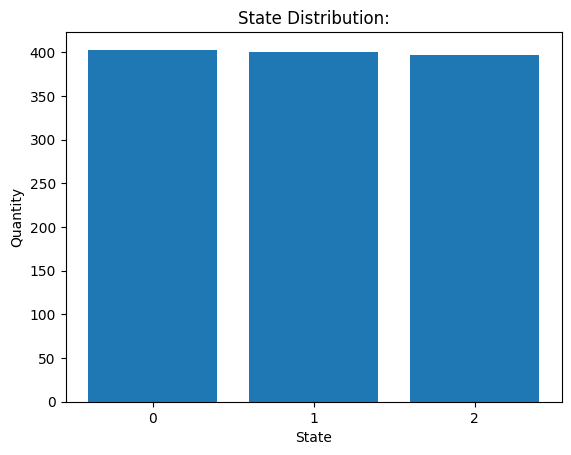

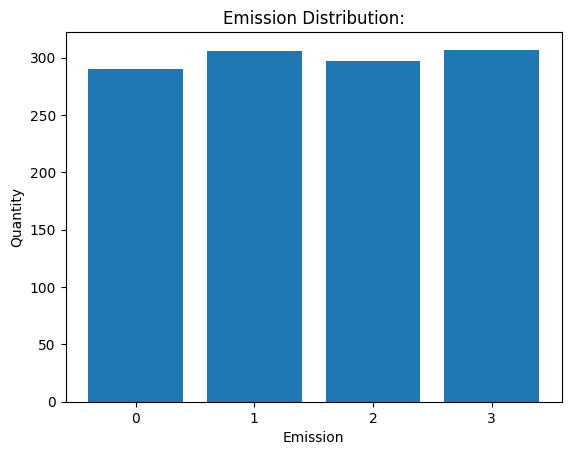

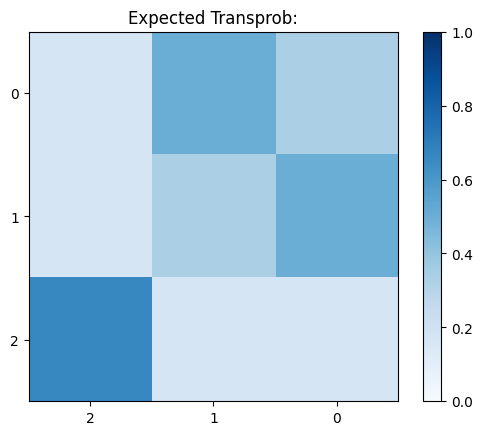

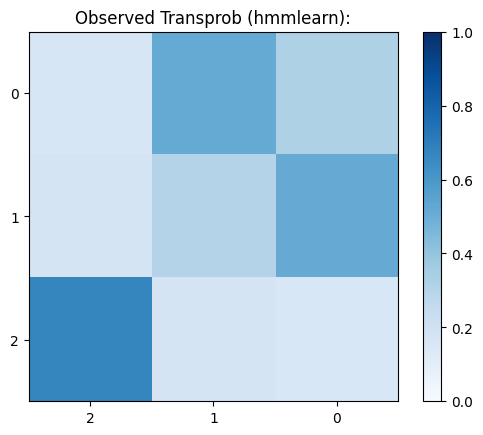

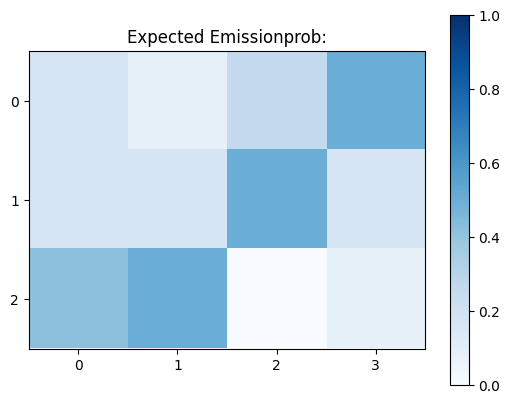

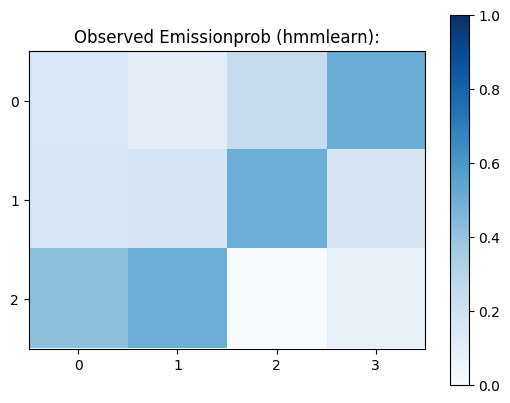

In [19]:
# Vergelijken met hmmlearn
model_hmm = hmm(n_components=3, n_features=4, init_params="")
model_hmm.transmat_ = np.array(list(transprob.values()))
model_hmm.emissionprob_ = np.array(list(emissionprob.values()))
model_hmm.startprob_ = startprob
emissions_hmm, states_hmm = model_hmm.sample(1200)

bar_plot(states, emissions, states_hmm, emissions_hmm)

observed_states, observed_emissions = model.determine_observations(states_hmm, emissions_hmm)

# Matrix plots voor overgangskansen
ylabs = [str(x) for x in states]

transprob_array = np.array(list(transprob.values()))

matrix_plot(transprob_array, "Expected Transprob:",  xlabs=ylabs[::-1], ylabs = ylabs)
matrix_plot(observed_states, "Observed Transprob (hmmlearn):", xlabs=ylabs[::-1], ylabs = ylabs)

# Matrix plots voor emissie kansen
xlabs = [str(x) for x in emissions]
emissionprob_array = np.array(list(emissionprob.values()))

matrix_plot(emissionprob_array, "Expected Emissionprob:", xlabs,  ylabs = ylabs)
matrix_plot(observed_emissions, "Observed Emissionprob (hmmlearn):", xlabs,  ylabs = ylabs)


## Conclusie plots: vergelijking hmmlearn/eigen model

De vergelijking in kwestie hier is dat van de sample() methode. Er is te zien dat bij zowel het genereren van de sequentie met de sample methode van ons model als dat van de methode van hmmlearn, de overgangskansen en emissiekansen sterk overeen komen met dat van de verwachte kansen. En ook de verdeling in de barplots lijkt gelijk. Er kan dus worden gesteld dat de sample methode van hmmlearn gelijke resultaten geeft als dat van ons model.

***

&copy; 2025 - Dave R.M. Langers <d.r.m.langers@pl.hanze.nl>